In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
files_in_directory = os.listdir(os.getcwd())

for file in files_in_directory:
    print(file)

dia-sci-question.ipynb
test_metrics_non_random_init.csv
test_metrics_reward1.csv
test_metrics_reward2.csv
test_metrics_reward3.csv
test_metrics_same_init.csv
train_metrics_reward1.csv
train_metrics_reward2.csv
train_metrics_reward3.csv


# The scientific questions we are trying to solve are 

### 1) What is the sensitivity of the agent to variations in the initial positioning of the target?

### 2) How does altering the reward system influence the agent's ability to learn and execute the required sequence of steps to accomplish the task?

## Let's analyse one by one

## 1) What is the sensitivity of the agent to variations in the initial positioning of the target?


#### Approach:

We conducted experiments by randomly changing the initial positions of the targets in one set and keeping them the same in another. Because the agent behaves non-deterministically, I ran each experiment 10 times and calculated the average results.


In [5]:
same_init = pd.read_csv('test_metrics_same_init.csv')
random_init = pd.read_csv('test_metrics_non_random_init.csv')
same_init.head(),random_init.head()

(   test_rewards  bullets_fired  test_scores
 0       -3268.0           61.0          2.0
 1       -3172.0           69.0          4.0
 2       -2900.0           67.0          4.0
 3       -3324.0           66.0          4.0
 4       -3602.0           63.0          3.0,
    test_rewards  bullets_fired  test_scores
 0       -3274.8           64.8          2.9
 1       -3243.2           65.2          3.2
 2       -3343.7           65.5          2.5
 3       -3154.5           65.5          3.7
 4       -3234.0           61.8          3.2)

In [6]:
t_statistic, p_value = stats.ttest_ind(same_init['test_scores'], random_init['test_scores'])


The hypotheses are 

\begin{align*}
H_0 &: \text{The means of the two samples are equal.} \\
H_a &: \text{The means of the two samples are not equal.}
\end{align*}


In [7]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.7392661700059806
P-value: 0.08729306810792685


In [8]:
if p_value < 0.05:
    print("Reject null hypothesis: There is sufficient evidence to support the alternative hypothesis.")
else:
    print("Fail to reject null hypothesis: There is not enough evidence to support the alternative hypothesis.")

Fail to reject null hypothesis: There is not enough evidence to support the alternative hypothesis.



This suggests that the agent's performance remains consistent regardless of variations in the initial positions of the targets. The observed uniformity in performance across experiments, despite changes in initializations, indicates a robust behavior in the agent. This resilience to variations in initial conditions underscores the stability and reliability of the agent's learning process.


## 2) How does altering the reward system influence the agent's ability to learn and execute the required sequence of steps to accomplish the task?

To address this inquiry, I initiated three experiments, progressively adjusting the reward system by incorporating penalties and rewards. Throughout these experiments, I measured three key metrics: rewards, scores achieved, the number of bullets fired, and subsequently derived accuracy from these metrics.

Reward System for Each Experiment

Experiment 1:

+100 for hitting the target

0 otherwise

Experiment 2:

+100 for hitting the target

-5 for firing a bullet

-1 for each timestep without hitting the target

0 otherwise


Experiment 3:

+100 for hitting the target

-5 for firing a bullet

-1 for each timestep without hitting the target

+1 for being close to the target without hitting it, with no penalty for passing a timestep without hitting the target

0 otherwise

In [9]:
exp1 = pd.read_csv('test_metrics_reward1.csv')
exp2 = pd.read_csv('test_metrics_reward2.csv')
exp3 = pd.read_csv('test_metrics_reward3.csv')

In [10]:
exp1.head()

,test_rewards,bullets_fired,test_scores
0,100,6,1
1,100,12,1
2,0,5,0
3,0,5,0
4,100,8,1


In [11]:
acc_exp1 = np.sum(exp1['test_scores']) / np.sum(exp1['bullets_fired'])
acc_exp2 = np.sum(exp2['test_scores']) / np.sum(exp2['bullets_fired'])
acc_exp3 = np.sum(exp3['test_scores']) / np.sum(exp3['bullets_fired'])


In [13]:
acc = (acc_exp1,acc_exp2,acc_exp3)
acc

(0.05823627287853577, 0.032036613272311214, 0.16282642089093702)

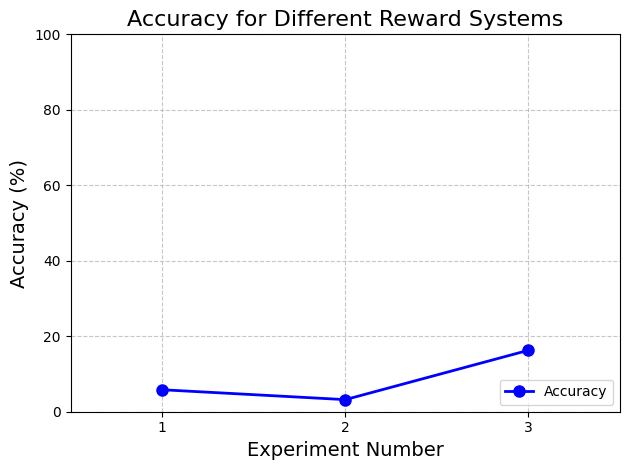

In [17]:
x_values = range(1, len(acc) + 1)

plt.plot(x_values, [val * 100 for val in acc], marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

plt.title('Accuracy for Different Reward Systems', fontsize=16)
plt.xlabel('Experiment Number', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

plt.xticks(x_values)
plt.xlim(0.5, len(acc) + 0.5)

plt.ylim(0, 100)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(['Accuracy'], loc='lower right')

plt.tight_layout()
plt.show()

We could see from the plot that precise and elaborate reward system improved overall accuracy

In [18]:
bullets_exp1 = np.mean(exp1['bullets_fired'])
bullets_exp2 = np.mean(exp2['bullets_fired'])
bullets_exp3 = np.mean(exp3['bullets_fired'])
bullets_fired = (bullets_exp1,bullets_exp2,bullets_exp3)

In [19]:
bullets_fired

(6.01, 4.37, 6.51)

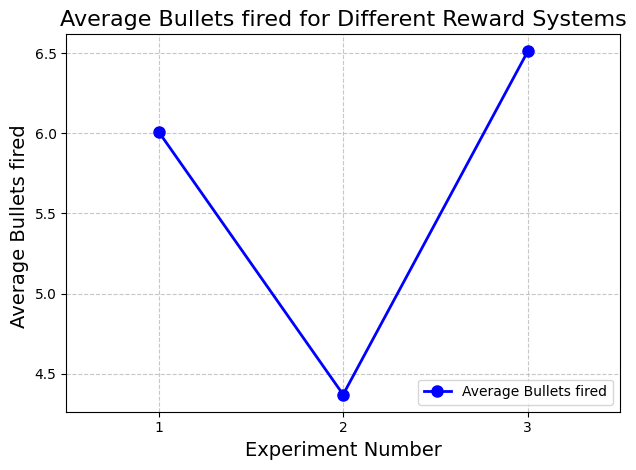

In [22]:


plt.plot(range(1,4),bullets_fired , marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

plt.title('Average Bullets fired for Different Reward Systems', fontsize=16)
plt.xlabel('Experiment Number', fontsize=14)
plt.ylabel('Average Bullets fired ', fontsize=14)

plt.xticks(range(1,4))
plt.xlim(0.5, 3.5)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(['Average Bullets fired'], loc='lower right')

plt.tight_layout()
plt.show()

Overall performance improvement of the agent

In [28]:
scores_exp1 = tuple(exp1['test_scores'])
scores_exp2 = tuple(exp2['test_scores'])
scores_exp3 = tuple(exp3['test_scores'])
scores = (scores_exp1,scores_exp2,scores_exp3)

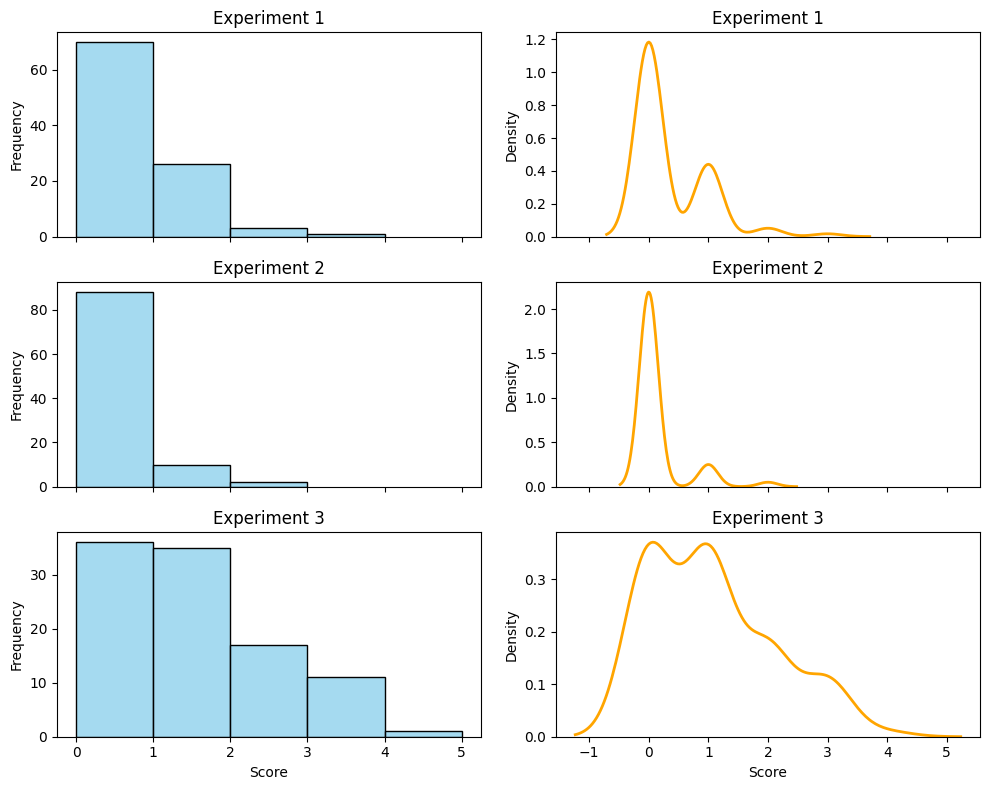

In [34]:
import seaborn as sns

fig, axes = plt.subplots(len(scores), 2, figsize=(10, 8), sharex='col')

for i, exp_scores in enumerate(scores, start=1):
    sns.histplot(exp_scores, bins=range(max(exp_scores) + 2), ax=axes[i-1, 0], color='skyblue', edgecolor='black', kde=False)
    axes[i-1, 0].set_title(f'Experiment {i}')
    axes[i-1, 0].set_ylabel('Frequency')

    sns.kdeplot(exp_scores, ax=axes[i-1, 1], color='orange', linewidth=2)
    axes[i-1, 1].set_title(f'Experiment {i}')
    axes[i-1, 1].set_ylabel('Density')

for ax in axes[-1, :]:
    ax.set_xlabel('Score')

plt.tight_layout()
plt.show()

The changes in the histograms from Experiment 1 to Experiment 3 show that the new reward system is helping the model do better. In Experiment 3, we can see that the scores are spread out more and hitting the target more often. This proves that when we use a better reward system, the model performs better overall.

References:

1) https://github.com/patrickloeber/snake-ai-pytorch
2) https://github.com/shivaverma/Orbit/tree/master/Paddle
3) Laud, Adam, and Gerald DeJong. "The influence of reward on the speed of reinforcement learning: An analysis of shaping." Proceedings of the 20th International Conference on Machine Learning (ICML-03). 2003.
4) Vinitsky, Eugene, et al. "Robust reinforcement learning using adversarial populations." arXiv preprint arXiv:2008.01825 (2020).
